# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 

%matplotlib inline

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [9]:
import string
pd.options.mode.chained_assignment = None
from datetime import datetime

1) Load data

In [10]:
def read_data(path, index, country):
    allFiles = glob.glob(path + "/*.csv")    
    list_ = []
    for file_ in allFiles:
        df = pd.read_csv(file_, index_col=index)
        df['country'] = country
        list_.append(df)    
    return pd.concat(list_, axis=0)

In [11]:
path =r'Data/ebola/guinea_data'
guinea =read_data(path, 'Description', 'guinea')

In [12]:
path =r'Data/ebola/liberia_data'
liberia =read_data( path, 'Variable', 'liberia')

In [13]:
path =r'Data/ebola/sl_data'
sl =read_data(path, 'variable', 'sl')
frames = [guinea, liberia, sl]
concatenated = pd.concat(frames)
#concatenated

### Task 1 Guinea

In [14]:
guinea = concatenated.loc[concatenated['country'] == 'guinea']
#guinea.head()

In [15]:
dropped =guinea[['Date', 'Totals','country']]
dropped =dropped.fillna(0)
dropped.head()

,Date,Totals,country
New cases of suspects,2014-08-04,5,guinea
New cases of probables,2014-08-04,0,guinea
New cases of confirmed,2014-08-04,4,guinea
Total new cases registered so far,2014-08-04,9,guinea
Total cases of suspects,2014-08-04,11,guinea


### Guinea deaths

In [16]:
deaths=dropped.loc['Total deaths (confirmed + probables + suspects)']
#deaths

In [17]:
deaths['Totals'] = deaths['Totals'].astype(int)
deaths['Date'] = deaths['Date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
grouped_months = deaths.groupby(deaths['Date'].apply(lambda x: x.month))


In [18]:
first_values = grouped_months.first()
first_values=first_values.rename(columns = {'Totals':'First_v_T'})
#first_values

In [19]:
last_values = grouped_months.last()
last_values=last_values.rename(columns = {'Totals':'last_v_T'})
#last_values

In [20]:
count = grouped_months.count()
count=count.rename(columns = {'Totals':'count_v_T'})
#count

In [21]:
frames1 = [first_values, last_values, count]
result1 = pd.concat(frames1, axis=1)
#result1

In [22]:
result1[['last_v_T']].sub(result1['First_v_T'], axis=0)
result1['Guinea_deaths Mean'] = result1['last_v_T']/result1['count_v_T']
result1

,Date,First_v_T,country,Date,last_v_T,country,Date,count_v_T,country,Guinea_deaths Mean
Date,,,,,,,,,,
8,2014-08-04,363,guinea,2014-08-31,489,guinea,5,5,5,97.800
9,2014-09-02,501,guinea,2014-09-30,714,guinea,16,16,16,44.625
10,2014-10-01,739,guinea,2014-10-01,739,guinea,1,1,1,739.000


In [23]:
August_deaths_Guinea = result1.iloc[0]['Guinea_deaths Mean']
September_deaths_Guinea = result1.iloc[1]['Guinea_deaths Mean']
October_deaths_Guinea = result1.iloc[2]['Guinea_deaths Mean']
October_deaths_Guinea

739.0

In [24]:
Guinea_deaths_Mean = pd.DataFrame({'August':August_deaths_Guinea,
                     'September':September_deaths_Guinea,
                     'October':October_deaths_Guinea }, index=['Guinea_deaths_Mean'])
Guinea_deaths_Mean

,August,October,September
Guinea_deaths_Mean,97.8,739.0,44.625


### Guinea new cases

In [25]:
new_cases=dropped.loc['Total new cases registered so far']
new_cases.head()

,Date,Totals,country
Total new cases registered so far,2014-08-04,9,guinea
Total new cases registered so far,2014-08-26,28,guinea
Total new cases registered so far,2014-08-27,22,guinea
Total new cases registered so far,2014-08-30,24,guinea
Total new cases registered so far,2014-08-31,46,guinea


In [26]:
new_cases.columns = ["Date", "Total_new_cases_guinea", "country"]

In [27]:
new_cases['Date'] = new_cases['Date'].apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
grouped_months_new = new_cases.groupby(new_cases['Date'].apply(lambda x: x.month))
new_cases['Total_new_cases_guinea'] = new_cases['Total_new_cases_guinea'].astype(int)

In [28]:
first_month = grouped_months_new.get_group(8) 
second_month = grouped_months_new.get_group(9) 
third_month = grouped_months_new.get_group(10) 
#first_month

In [29]:
August_guinea =first_month[['Total_new_cases_guinea']].mean(axis=0)
September_guinea =second_month[['Total_new_cases_guinea']].mean(axis=0)
October_guinea =third_month[['Total_new_cases_guinea']].mean(axis=0)
Guinea_new_cases_Mean = pd.DataFrame({'August':August_guinea,
                     'September':September_guinea,
                     'October':October_guinea})
Guinea_new_cases_Mean

,August,October,September
Total_new_cases_guinea,25.8,34.0,19.625


### Liberia

In [30]:
liberia = concatenated.loc[concatenated['country'] == 'liberia']
liberia =liberia.fillna(0)
dropped_liberia =liberia[['Date','National','country']]

dropped_liberia['Date'] = pd.to_datetime(dropped_liberia['Date'])
dropped_liberia.head()


,Date,National,country
Specimens collected,2014-06-16,1.0,liberia
Specimens pending for testing,2014-06-16,0.0,liberia
Total specimens tested,2014-06-16,28.0,liberia
Newly reported deaths,2014-06-16,2.0,liberia
Total death/s in confirmed cases,2014-06-16,8.0,liberia


### Liberia deaths

In [31]:
deaths_liberia =dropped_liberia.loc['Total death/s in confirmed, probable, suspected cases']
#deaths_liberia.head()


In [32]:
grouped_months_liberia = deaths_liberia.groupby(deaths_liberia['Date'].apply(lambda x: x.month))
deaths_liberia['National'] = deaths_liberia['National'].astype(int)
#grouped_months_liberia.head()

In [33]:
first_values_liberia = grouped_months_liberia.first()
first_values_liberia=first_values_liberia.rename(columns = {'National':'First_v_T'})
first_values_liberia.head()

,Date,First_v_T,country
Date,,,
6,2014-06-16,16,liberia
7,2014-07-01,61,liberia
8,2014-08-02,257,liberia
9,2014-09-01,1004,liberia
10,2014-10-01,2082,liberia


In [34]:
last_values_liberia = grouped_months_liberia.last()
last_values_liberia=last_values_liberia.rename(columns = {'National':'last_v_T'})
#last_values

In [35]:
count_liberia = grouped_months_liberia.count()
count_liberia=count_liberia.rename(columns = {'National':'count_v_T'})
#count

In [36]:
frames_liberia = [first_values_liberia, last_values_liberia, count_liberia]
result_liberia = pd.concat(frames_liberia, axis=1)
#result_liberia

In [37]:
result_liberia[['last_v_T']].sub(result_liberia['First_v_T'], axis=0)
result_liberia['Mean deaths'] = result_liberia['last_v_T']/result_liberia['count_v_T']
result_liberia

,Date,First_v_T,country,Date,last_v_T,country,Date,count_v_T,country,Mean deaths
Date,,,,,,,,,,
6,2014-06-16,16,liberia,2014-06-29,49,liberia,7,7,7,7.000000
7,2014-07-01,61,liberia,2014-07-26,145,liberia,11,11,11,13.181818
8,2014-08-02,257,liberia,2014-08-28,885,liberia,9,9,9,98.333333
9,2014-09-01,1004,liberia,2014-09-30,2058,liberia,24,24,24,85.750000
10,2014-10-01,2082,liberia,2014-10-30,2636,liberia,24,24,24,109.833333
11,2014-11-02,2700,liberia,2014-11-02,2700,liberia,1,1,1,2700.000000


In [38]:
June_deaths_liberia = result_liberia.iloc[0]['Mean deaths']
July_deaths_liberia = result_liberia.iloc[1]['Mean deaths']
August_deaths_liberia = result_liberia.iloc[2]['Mean deaths']
September_deaths_liberia = result_liberia.iloc[3]['Mean deaths']
October_deaths_liberia = result_liberia.iloc[4]['Mean deaths']
November_deaths_liberia = result_liberia.iloc[5]['Mean deaths']

In [39]:
Liberia_deaths_Mean = pd.DataFrame({'June':June_deaths_liberia,
                     'July':July_deaths_liberia,
                     'August':August_deaths_liberia,
                    'September':August_deaths_liberia ,
                    'October':September_deaths_liberia,
                    'November':October_deaths_liberia,
                    'Desember':November_deaths_liberia}, index=['Liberia_deaths_Mean'])
Liberia_deaths_Mean

,August,Desember,July,June,November,October,September
Liberia_deaths_Mean,98.333333,2700.0,13.181818,7.0,109.833333,85.75,98.333333


### Liberia new cases

In [40]:
new_cases_liberia1 =dropped_liberia.loc['New Case/s (Suspected)']
new_cases_liberia2 =dropped_liberia.loc['New Case/s (Probable)']
new_cases_liberia3 =dropped_liberia.loc['New case/s (confirmed)']

In [41]:
new_cases_liberia1 = new_cases_liberia1.reset_index(drop=True)
new_cases_liberia1.columns = ["Date", "New Case/s (Suspected)", "country"]
#print(new_cases_liberia1[["Date", "New Case/s (Suspected)", "country"]])

new_cases_liberia2 = new_cases_liberia2.reset_index(drop=True)
new_cases_liberia2.columns = ["Date", "New Case/s (Probable)", "country"]
#print(new_cases_liberia2[["Date", "New Case/s (Probable)", "country"]])

new_cases_liberia3 = new_cases_liberia3.reset_index(drop=True)
new_cases_liberia3.columns = ["Date", "New case/s (confirmed)", "country"]
#print(new_cases_liberia1[["Date", "New case/s (confirmed)", "country"]])

new_cases_liberia_ = [new_cases_liberia1, new_cases_liberia2, new_cases_liberia3]
new_cases_liberia_concat = pd.concat(new_cases_liberia_, axis=1)
#new_cases_liberia_concat


In [42]:
new_cases_liberia_concat['Total_new_cases_liberia'] = new_cases_liberia_concat["New Case/s (Suspected)"] + new_cases_liberia_concat['New Case/s (Probable)']+new_cases_liberia_concat['New case/s (confirmed)']
new_cases_liberia_concat.head()

,Date,New Case/s (Suspected),country,Date,New Case/s (Probable),country,Date,New case/s (confirmed),country,Total_new_cases_liberia
0,2014-06-16,2.0,liberia,2014-06-16,1.0,liberia,2014-06-16,1.0,liberia,4.0
1,2014-06-17,2.0,liberia,2014-06-17,0.0,liberia,2014-06-17,0.0,liberia,2.0
2,2014-06-22,5.0,liberia,2014-06-22,0.0,liberia,2014-06-22,5.0,liberia,10.0
3,2014-06-24,2.0,liberia,2014-06-24,0.0,liberia,2014-06-24,4.0,liberia,6.0
4,2014-06-25,4.0,liberia,2014-06-25,1.0,liberia,2014-06-25,2.0,liberia,7.0


In [43]:
new_cases_liberia_concat.columns = ["Date", "New Case/s (Suspected)","country","Date1","New Case/s (Probable)","country","Date2","New case/s (confirmed)","country","Total_new_cases_liberia"]
Total_new_cases_liberia =new_cases_liberia_concat[['Date','Total_new_cases_liberia']]
Total_new_cases_liberia.head()
#new_cases_liberia_concat.drop(new_cases_liberia_concat.columns[[1, 2]], axis=1, inplace=True)


,Date,Total_new_cases_liberia
0,2014-06-16,4.0
1,2014-06-17,2.0
2,2014-06-22,10.0
3,2014-06-24,6.0
4,2014-06-25,7.0


In [44]:
grouped_months_liberia = Total_new_cases_liberia.groupby(Total_new_cases_liberia['Date'].apply(lambda x: x.month))
new_cases_liberia_concat['Total_new_cases_liberia'] = new_cases_liberia_concat['Total_new_cases_liberia'].astype(int)

In [45]:
first_month = grouped_months_liberia.get_group(6) 
second_month = grouped_months_liberia.get_group(7) 
third_month = grouped_months_liberia.get_group(8) 
fourt_month = grouped_months_liberia.get_group(9) 
fifth_month = grouped_months_liberia.get_group(10) 
sexth_month = grouped_months_liberia.get_group(11) 


In [46]:
June_liberia = first_month[['Total_new_cases_liberia']].mean(axis=0)
July_liberia = second_month[['Total_new_cases_liberia']].mean(axis=0)
August_liberia = third_month[['Total_new_cases_liberia']].mean(axis=0)
September_liberia = fourt_month[['Total_new_cases_liberia']].mean(axis=0)
October_liberia = fifth_month[['Total_new_cases_liberia']].mean(axis=0)
November_liberia = sexth_month[['Total_new_cases_liberia']].mean(axis=0)

In [47]:
Liberia_new_cases_Mean = pd.DataFrame({'June':June_liberia,
                     'July':July_liberia,
                     'August':August_liberia,
                    'September':September_liberia ,
                    'October':October_liberia,
                    'November':November_liberia })
Liberia_new_cases_Mean

,August,July,June,November,October,September
Total_new_cases_liberia,37.222222,8.545455,5.714286,26.466667,45.56,63.833333


### Sierra Leone

In [48]:
deaths_Sl1 =dropped_Sl.loc['death_suspected']
deaths_Sl2 =dropped_Sl.loc['death_probable']
deaths_Sl3 =dropped_Sl.loc['death_confirmed']
#deaths_Sl3.head()

NameError: name 'dropped_Sl' is not defined

In [ ]:
deaths_Sl1 = deaths_Sl1.reset_index(drop=True)
deaths_Sl1.columns = ["date", "death_suspected", "country"]
#print(new_cases_liberia1[["Date", "New Case/s (Suspected)", "country"]])

deaths_Sl2 = deaths_Sl2.reset_index(drop=True)
deaths_Sl2.columns = ["date", "death_probable", "country"]
#print(new_cases_liberia2[["Date", "New Case/s (Probable)", "country"]])

deaths_Sl3 = deaths_Sl3.reset_index(drop=True)
deaths_Sl3.columns = ["date", "death_confirmed", "country"]
#print(new_cases_liberia1[["Date", "New case/s (confirmed)", "country"]])

deaths_Sl_ = [deaths_Sl1, deaths_Sl2, deaths_Sl3]
deaths_Sl_concat = pd.concat(deaths_Sl_, axis=1)
deaths_Sl_concat.head()
deaths_Sl_concat['death_suspected'] = pd.to_numeric(deaths_Sl_concat['death_suspected'])
deaths_Sl_concat['death_probable'] = pd.to_numeric(deaths_Sl_concat['death_probable'])
deaths_Sl_concat['death_confirmed'] = pd.to_numeric(deaths_Sl_concat['death_confirmed'])

In [ ]:
deaths_Sl_concat['Total_deaths_Sl'] = deaths_Sl_concat['death_suspected'] + deaths_Sl_concat['death_probable'] + deaths_Sl_concat['death_confirmed']
deaths_Sl_concat.head()

In [ ]:
deaths_Sl_concat['Total_deaths_Sl'] = deaths_Sl_concat['Total_deaths_Sl'].astype(int)
deaths_Sl_concat.columns = ["date", "death_suspected","country","date1","death_probable","country","date2","death_confirmed","country","Total_deaths_Sl"]
Total_deaths_Sl =deaths_Sl_concat[['date','Total_deaths_Sl']]
#deaths_Sl_concat['Total_deaths_Sl'] = deaths_Sl_concat['Total_deaths_Sl'].astype(int)
Total_deaths_Sl.head()

In [ ]:
grouped_months_Sl = Total_deaths_Sl.groupby(Total_deaths_Sl['date'].apply(lambda x: x.month))
#new_cases_Sl_concat['Total_new_cases_Sl'] = new_cases_Sl_concat['Total_new_cases_Sl'].astype(int)
#grouped_months_Sl.head()

In [ ]:
first_values_Sl = grouped_months_Sl.first()
first_values_Sl=first_values_Sl.rename(columns = {'Total_deaths_Sl':'First_sl_T'})
last_values_Sl = grouped_months_Sl.last()
last_values_Sl=last_values_Sl.rename(columns = {'Total_deaths_Sl':'last_sl_T'})
count_Sl = grouped_months_Sl.count()
count_Sl=count_Sl.rename(columns = {'Total_deaths_Sl':'count_sl_T'})
#count_Sl

In [ ]:
frames_Sl = [first_values_Sl, last_values_Sl, count_Sl]
result_Sl = pd.concat(frames_Sl, axis=1)

In [ ]:
result_Sl[['last_sl_T']].sub(result_Sl['First_sl_T'], axis=0)
result_Sl['Mean deaths'] = result_Sl['last_sl_T']/result_Sl['count_sl_T']
result_Sl

In [ ]:
August_deaths_Sl = result_Sl.iloc[0]['Mean deaths']
September_deaths_Sl = result_Sl.iloc[1]['Mean deaths']
October_deaths_Sl = result_Sl.iloc[2]['Mean deaths']
November_deaths_Sl = result_Sl.iloc[3]['Mean deaths']
Desember_deaths_Sl = result_Sl.iloc[4]['Mean deaths']

In [ ]:
Sl_deaths_Mean = pd.DataFrame({'August':August_deaths_Sl,
                     'September':September_deaths_Sl,
                     'October':October_deaths_Sl,
                    'November':November_deaths_Sl ,
                    'Desember':Desember_deaths_Sl} ,index=['Sl_deaths_Mean'])
Sl_deaths_Mean

### Sierra Leone new cases

In [ ]:
new_cases_Sl1 =dropped_Sl.loc['new_suspected']
new_cases_Sl2 =dropped_Sl.loc['new_probable']
new_cases_Sl3 =dropped_Sl.loc['new_confirmed']
new_cases_Sl3.head()

In [ ]:
new_cases_Sl1 = new_cases_Sl1.reset_index(drop=True)
new_cases_Sl1.columns = ["Date", "new_suspected", "country"]

new_cases_Sl2 = new_cases_Sl2.reset_index(drop=True)
new_cases_Sl2.columns = ["Date", "new_probable", "country"]

new_cases_Sl3 = new_cases_liberia3.reset_index(drop=True)
new_cases_Sl3.columns = ["Date", "new_confirmed", "country"]

new_cases_Sl_ = [new_cases_Sl1, new_cases_Sl2, new_cases_Sl3]
new_cases_Sl_concat = pd.concat(new_cases_Sl_, axis=1)
new_cases_Sl_concat.head()
new_cases_Sl_concat['new_suspected'] = pd.to_numeric(new_cases_Sl_concat['new_suspected'])
new_cases_Sl_concat['new_probable'] = pd.to_numeric(new_cases_Sl_concat['new_probable'])
new_cases_Sl_concat['new_confirmed'] = pd.to_numeric(new_cases_Sl_concat['new_confirmed'])

In [ ]:
new_cases_Sl_concat['Total_new_cases_Sl'] = new_cases_Sl_concat['new_suspected'] + new_cases_Sl_concat['new_probable'] + new_cases_Sl_concat['new_confirmed']
new_cases_Sl_concat.head()

In [ ]:
new_cases_Sl_concat.columns = ["Date", "new_suspected","country","Date1","new_probable","country","Date2","new_confirmed","country","Total_new_cases_Sl"]
Total_new_cases_Sl =new_cases_Sl_concat[['Date','Total_new_cases_Sl']]
Total_new_cases_Sl =Total_new_cases_Sl.fillna(0)
Total_new_cases_Sl['Total_new_cases_Sl'] = pd.to_numeric(Total_new_cases_Sl['Total_new_cases_Sl'])
#Total_new_cases_Sl

grouped_months_Sl = Total_new_cases_Sl.groupby(Total_new_cases_Sl['Date'].apply(lambda x: x.month))

#new_cases_Sl_concat['Total_new_cases_Sl'] = new_cases_Sl_concat['Total_new_cases_Sl'].astype(int)

first_month_Sl = grouped_months_Sl.get_group(8) 
second_month_Sl = grouped_months_Sl.get_group(9) 
third_month_Sl = grouped_months_Sl.get_group(10) 
fourth_month_Sl = grouped_months_Sl.get_group(11) 
fifth_month_Sl = grouped_months_Sl.get_group(12) 
#first_month_Sl

August_sl = first_month_Sl[['Total_new_cases_Sl']].mean(axis=0)
September_sl = second_month_Sl[['Total_new_cases_Sl']].mean(axis=0)
October_sl = third_month_Sl[['Total_new_cases_Sl']].mean(axis=0)
November_sl = fourth_month_Sl[['Total_new_cases_Sl']].mean(axis=0)
September_sl = fifth_month_Sl[['Total_new_cases_Sl']].mean(axis=0)

Sl_new_cases_Mean = pd.DataFrame({'August':August_sl,
                     'September':September_sl,
                     'October':October_sl,
                    'November':November_sl,
                    'September':September_sl})
Sl_new_cases_Mean



### Conclusion

In [50]:
Guinea_deaths_Mean
#Guinea_new_cases_Mean

Liberia_deaths_Mean
Liberia_new_cases_Mean

Sl_deaths_Mean
Sl_new_cases_Mean

Solution = [Guinea_deaths_Mean, Liberia_deaths_Mean, Sl_deaths_Mean, Guinea_new_cases_Mean, Liberia_new_cases_Mean, Sl_new_cases_Mean]
Solution = pd.concat(Solution, axis=0)
Solution[['June','July','August', 'September','October','November','Desember']]

NameError: name 'Sl_deaths_Mean' is not defined

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

1) Import os (basename) and Glob (in the first cell), which will be used to get the BARCODE and append this information to each row of our dataframe.

In [ ]:
from os.path import basename 
import os
import glob

2) Preparing regular expression to fetch all the MID* xls files

In [ ]:
path = './Data/microbiome'
doc_names = glob.glob(path + '/MID*.xls')

3) Create empty dataframe and data_list which will contain the list of all rows in each file (df) 

In [ ]:
data = pd.DataFrame()
data_list = []
for file_ in doc_names:
    col_name = os.path.splitext(basename(file_))[0] 
    df = pd.read_excel(file_, index_col=0, names=["Value"], header=None).assign(BARCODE=col_name)
    data_list.append(df)

4) Store all rows from data_list (originally from the 9 files) into our dataframe "data"

In [ ]:
data = pd.concat(data_list, axis=0).fillna(value = "unknown")

data.index.name = 'Name'

5) Store data from metadata.xls into the "meta" dataframe, setting BARCODE as index

In [ ]:
meta = pd.read_excel("./Data/microbiome/metadata.xls", index_col="BARCODE").fillna(value="Na")

6) Unite information from the "data" dataframe with the ones from "meta", on the common BARCODE

In [ ]:
joinresult = data.join(meta, on="BARCODE")
joinresult.reset_index(inplace=True)

7) Setting the new key as Name + BARCODE, this combination is unique

In [ ]:
res = joinresult.set_index(['Name', 'BARCODE'])

print(res)

8) Proof of uniqueness of the key

In [ ]:
print(res.index.is_unique)

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename='Data/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.
import matplotlib.pyplot as plt

In [ ]:
titanic = pd.read_excel('Data/titanic.xls')

Q1. 

The function 'describe' shows us the information regarding the data type of an attribute and its range. 

In [ ]:
for column in titanic:
    print(titanic[column].describe())
    print()

We put into parenthesis the data type as indicated from the above code

1.pclass integer(float64) min:1.0 - max:3.0
2.survived double(float64) min:0.0 - max:1.0
3.name character(object)
4.sex integer(object)
5.age double(float64) min:0.166700 - max:80
6.sibs double(float64) min:0.0 - max:8.0
7.parch double(float64) min:0.0 - max:9.0
8.ticket character(object)
9.fare double(float64) mi:0.000000 - max512.329200
10.cabin integer(object)
11.embarked integer(object)
12.boat integer(object)
13.body double(float64) min:1.0 - max:328.0
14.home.dest character(object)

According to the html file the attributes that have a small number of discrete values which could divide the data into categories are the following: 'pclass', 'sex', 'embarked'.
Ιntuitively, the attribute 'survived' could be categorical τοo, which is prooved by the code below: 

In [ ]:
titanic.survived.value_counts()

In [ ]:
pd.Categorical(titanic.pclass)
pd.Categorical(titanic.survived)
pd.Categorical(titanic.embarked)
pd.Categorical(titanic.pclass)
pd.Categorical(titanic.sex)

Q2. 

We pass the argument kind='bar' to plot histograms. For the histogram of atribute 'age', the method cut dicretize the continuous variable 'age' based on the decade intervals we give as arguments.

In [ ]:
titanic.pclass.value_counts(sort=False).plot(kind='bar')

In [ ]:
titanic.embarked.value_counts(sort=False).plot(kind='bar')

In [ ]:
titanic.sex.value_counts(sort=False).plot(kind='bar')

In [ ]:
pd.cut(titanic.age, [0,10,20,30,40,50,60,70,80]).value_counts(sort=False).plot(kind='bar')

Q3. 

Each cabin has a initial letter in its identification which denotes the floor on which it is located. In a few cases there appear to be multiple cabin identifications but all are located on the same floor. Hence, we can focus on any of them.
-we create a column including all the initial characters
-for each char we count their occurences
-we create a table of frequencies by dividing the counter of a letter by the total number of all the entries which had a value.   for the latter we use the function sum()   
-plot the data

In [ ]:
first = titanic.cabin.str[0]
counts = first.value_counts()
freq = pd.Series(counts.values/sum(counts), 'Floor ' + counts.index)
freq.plot.pie()

Q4. For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

-We group our data by the attribute pclass.
-We calculate the mean value for all the attributes. We will use only the values of column survived
-We plot the pie
    we will plot different pies based on all the possible categories we can have according to the travel class
    we iterate each row of the grouped data and we get the mean for attribute survived. Since this attribute gets only 0 or 1 
    as value, the mean is equal to the frequency of value 1 (i.e. the frequency of passengers who survived). '1-freq' indicates
    the frequency of non-survivals  

        survived        age     sibsp     parch       fare        body
pclass                                                                
1       0.619195  39.159918  0.436533  0.365325  87.508992  162.828571
2       0.429603  29.506705  0.393502  0.368231  21.179196  167.387097
3       0.255289  24.816367  0.568406  0.400564  13.302889  155.818182



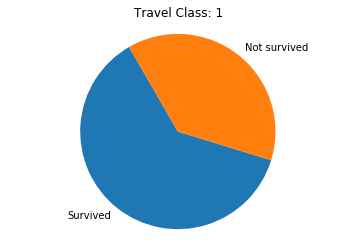

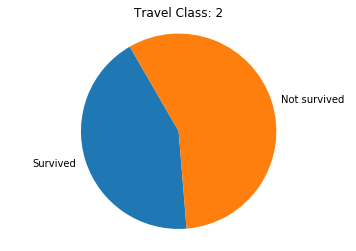

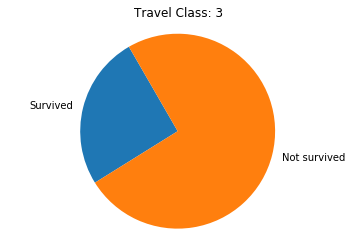

In [51]:
titanic_grouped = titanic.groupby(titanic.pclass)
mean = titanic_grouped.mean()
print(mean)
print()

labels = 'Survived', 'Not survived'
for index, row in mean.iterrows():
    sizes = [row['survived'], 1-row['survived']]
    plt.title("Travel Class: " + str(index))
    plt.pie(sizes, labels=labels, startangle=840)
    plt.axis('equal')
    plt.show()

Q5. 

This time we group by both travel class and sex
Again the mean value for the attribute survived is equal to the frequency
Some modifications in the plot where required in order to present the bar chart in a clear way
    with the xticks function we present in a distinct way the 6 different group. Configuring the string names if the values
    and the gaps between them

               survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167



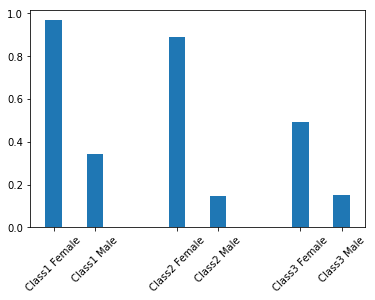

In [52]:
titanic_grouped = titanic.groupby(['pclass','sex'])
mean = titanic_grouped.mean()
print(mean)
print()

y = []
for index, row in mean.iterrows():
    y.append(row['survived'])

x = np.array([0,2,6,8,12,14])
my_xticks = ['Class1 Female','Class1 Male','Class2 Female','Class2 Male', 'Class3 Female', 'Class3 Male']
plt.xticks(x, my_xticks, rotation=45)
plt.bar(x, y)
plt.show()

Q6. Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index

Since the question refers to 2 equally populated age categories, we randomly choose to split the population <= 29 years old.
Initial checks: 
 -The number of entries must be an even number -->  7966
 -The median age, since people with the same age must be in the same category --> The median is 21
  first group: 4060 entries, second group: 3906 entries. !!A small δ is acceptable according to the instructions
 
We dicretize the value according to the aforementioned categories. Then we add the created column into the initial dataframe (with all the passengers aged under 29 yeard old), keeping the same index. The new column is named 'age_cat'. Since no changes occured to the order of the dicretized column, the new values fit perfectly with the existing ones.

Now we group by the required attributes: ['age_cat','pclass','sex']. The different groups created are in total 12 (2*3*2), according to the possible values that each attribute has. The index is the original id of people and it is still unique because no person can be in multiple groups. So each person appears only once in the new dataframe

In [7]:
titanic_new = titanic[titanic.age<=29]
print("Number of entries: " + str(titanic_new.size)) 
print(titanic_new.age.describe())
print("First group: "+str(titanic_new[titanic_new.age<=21].size))
print("Second group: "+str(titanic_new[titanic_new.age>21].size)+"\n")

titanic_cut = pd.cut(titanic_new.age, [0,21,29])
titanic_new['age_cat'] = pd.Series(titanic_cut, index=titanic_new.index)

titanic_grooped = titanic_new.groupby(['age_cat','pclass','sex'])
for group in titanic_grooped:
    print('group', group)

Number of entries: 7966
count    569.000000
mean      19.529291
std        7.653128
min        0.166700
25%       17.000000
50%       21.000000
75%       25.000000
max       29.000000
Name: age, dtype: float64
First group: 4060
Second group: 3906

group ((Interval(0, 21, closed='right'), 1, 'female'),      pclass  survived                                               name  \
2         1         0                       Allison, Miss. Helen Loraine   
11        1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
27        1         1            Bishop, Mrs. Dickinson H (Helen Walton)   
55        1         1                          Carter, Miss. Lucile Polk   
92        1         1          Dick, Mrs. Albert Adrian (Vera Gillespie)   
137       1         1                       Graham, Miss. Margaret Edith   
159       1         1                       Hippach, Miss. Jean Gertrude   
187       1         1                          Lines, Miss. Mary Conover   
190       1  

group ((Interval(21, 29, closed='right'), 2, 'male'),      pclass  survived                                        name   sex   age  \
327       2         0                    Andrew, Mr. Frank Thomas  male  25.0   
332       2         0              Baimbrigge, Mr. Charles Robert  male  23.0   
334       2         0               Banfield, Mr. Frederick James  male  28.0   
338       2         0                  Beauchamp, Mr. Henry James  male  28.0   
345       2         0                  Berriman, Mr. William John  male  23.0   
346       2         0                  Botsford, Mr. William Hull  male  26.0   
348       2         0                        Bracken, Mr. James H  male  27.0   
354       2         0             Bryhl, Mr. Kurt Arnold Gottfrid  male  25.0   
356       2         0                 Butler, Mr. Reginald Fenton  male  25.0   
360       2         1                Caldwell, Mr. Albert Francis  male  26.0   
372       2         0               Clarke, Mr. Charles